In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('./weatherHistory.csv')[['Formatted Date', 'Temperature (C)']].rename(columns={'Formatted Date': 'Date', 'Temperature (C)': 'Temperature'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         96453 non-null  object 
 1   Temperature  96453 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


In [3]:
df['Date'] = pd.date_range(start='2006-04-01', periods=96453, freq='H')
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2006-04-01 00:00:00 to 2017-04-01 20:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  96453 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [4]:
df

,Temperature
Date,
2006-04-01 00:00:00,9.472222
2006-04-01 01:00:00,9.355556
2006-04-01 02:00:00,9.377778
2006-04-01 03:00:00,8.288889
2006-04-01 04:00:00,8.755556
...,...
2017-04-01 16:00:00,26.016667
2017-04-01 17:00:00,24.583333
2017-04-01 18:00:00,22.038889


## Series Plot

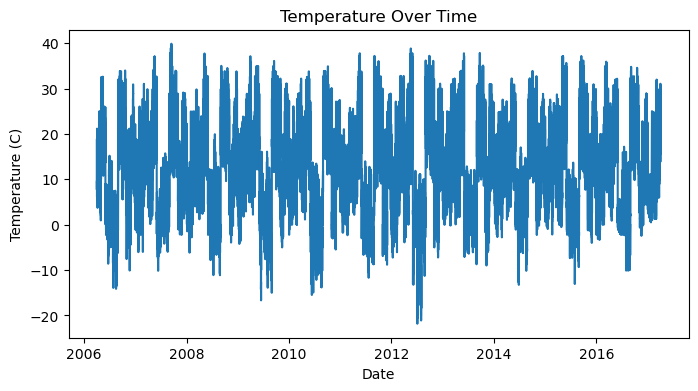

In [5]:
plt.figure(figsize=(8,4))
plt.plot(df)
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()

## Time Series division

In [6]:
train, val, test = df.loc['2006':'2013'], df.loc['2014':'2015'], df.loc['2016':]

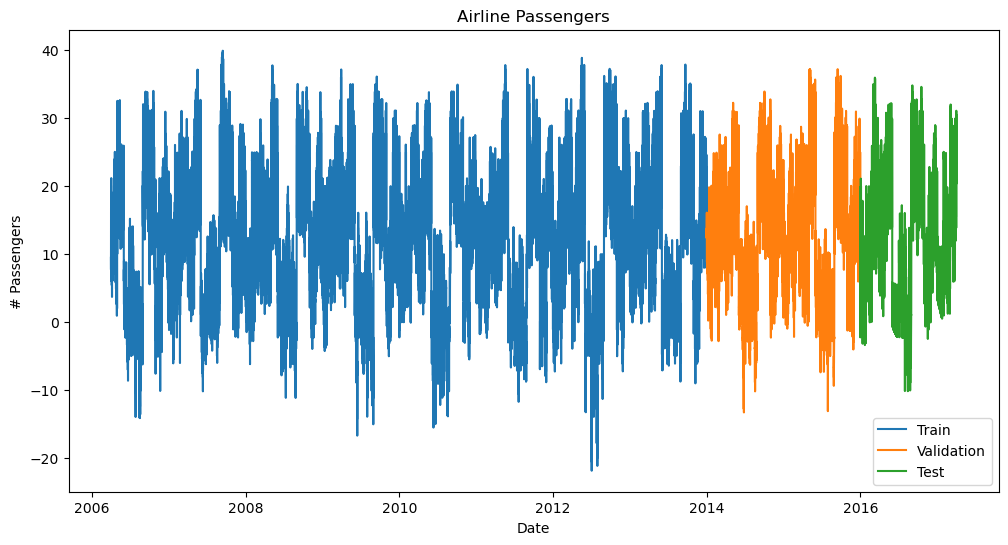

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label='Train')
plt.plot(val.index, val.values, label='Validation')
plt.plot(test.index, test.values, label='Test')
plt.title('Airline Passengers')
plt.xlabel('Date')
plt.ylabel('# Passengers')
plt.legend()
plt.show()

## Test Stationarity

In [8]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

In [9]:
import statsmodels.api as sm

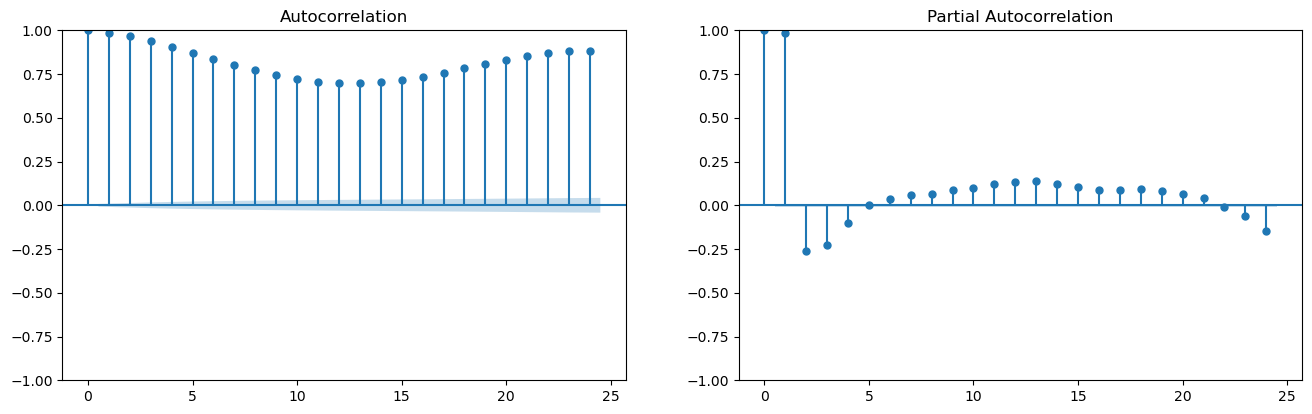

In [10]:
acf_pacf(train, 24)

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def stationary_test(series):
  p_value = adfuller(series)[1]
  print(p_value)
  if p_value < 0.05:
    print("Stationary series")
  else:
    print("Non-stationary series")

In [13]:
stationary_test(train)

5.428040896826323e-16
Stationary series


## Grid Search

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools

In [15]:
p = range(0, 2) # Autoregression
d = [0]         # Differentiation
q = range(0, 2) # Moving average
s = [12]        # Seasonality

In [16]:
all_params = list(itertools.product(p, d, q, s))

In [17]:
best_score = float("inf")
best_params = None
for params in all_params:
    try:
        model = SARIMAX(train, order=params[:3], seasonal_order=params)
        result = model.fit()
        pred = result.get_forecast(steps=len(val))
        mse = mean_squared_error(val, pred.predicted_mean)
        if mse < best_score:
            best_score = mse
            best_params = params
    except:
        continue

/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10


 This problem is unconstrained.
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will 

In [18]:
train_complete = result = pd.concat([train, val])
train_complete

,Temperature
Date,
2006-04-01 00:00:00,9.472222
2006-04-01 01:00:00,9.355556
2006-04-01 02:00:00,9.377778
2006-04-01 03:00:00,8.288889
2006-04-01 04:00:00,8.755556
...,...
2015-12-31 19:00:00,18.283333
2015-12-31 20:00:00,0.577778
2015-12-31 21:00:00,0.677778


In [19]:
model = SARIMAX(train_complete, order=best_params[:3], seasonal_order=best_params)
result = model.fit()
pred = result.forecast(steps=len(test))

/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


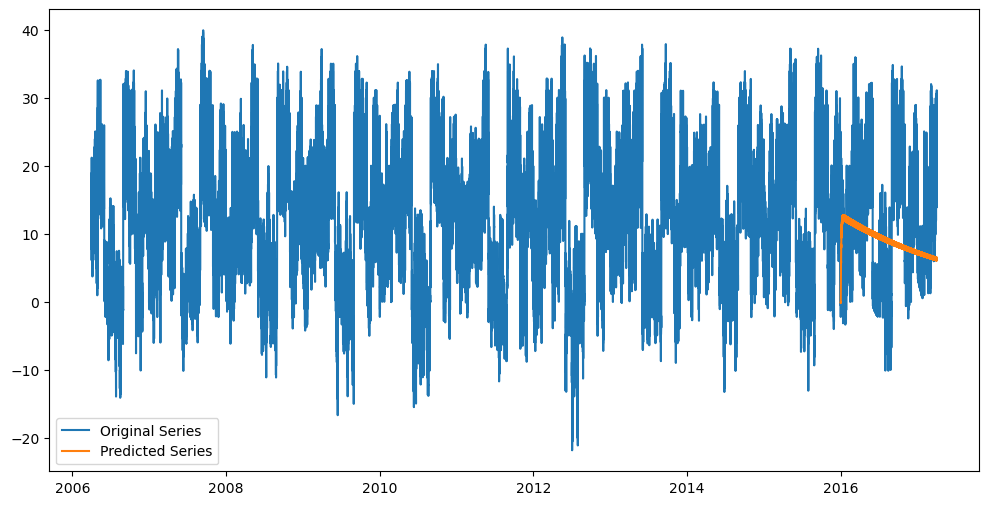

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df, label='Original Series')
plt.plot(pred, label='Predicted Series')
plt.legend()
plt.show()